## Observations and Insights 

In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [118]:
# Checking the number of mice.
number_of_mice = len(combined_data["Mouse ID"].unique())
number_of_mice

249

In [119]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
check_dups = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
check_dups


array(['g989'], dtype=object)

In [120]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = combined_data.loc[combined_data["Mouse ID"] == 'g989']
duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[combined_data['Mouse ID'].isin(check_dups)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Create a list that store drug regimen and tumor volume and groupby
statistics_list = clean_df.groupby(['Drug Regimen'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_mean = round(statistics_list['Tumor Volume (mm3)'].mean(),2)
drug_med = round(statistics_list['Tumor Volume (mm3)'].median(),2)
drug_var = round(statistics_list['Tumor Volume (mm3)'].var(),2)
drug_std = round(statistics_list['Tumor Volume (mm3)'].std(),2)
drug_sem = round(statistics_list['Tumor Volume (mm3)'].sem(),2)

# Assemble the resulting series into a single summary dataframe.
summary_statistics_df = pd.DataFrame ({"Mean": drug_mean,
                                       "Median": drug_med,
                                       "Variance": drug_var,
                                       "Standard Deviation": drug_std,
                                       "SEM": drug_sem
})


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_df
# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

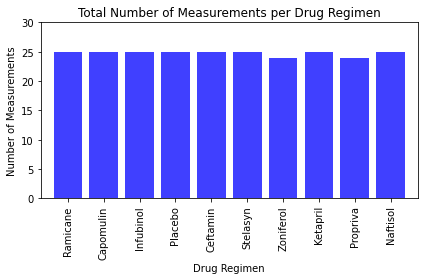

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#Create values for x_axis
unique_drug_regimen = clean_df['Drug Regimen'].unique()
x_axis = np.arange(0, len(unique_drug_regimen))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

#Create values for y_axis
drug_count = clean_df.groupby(['Drug Regimen']).nunique()
y_axis = drug_count['Mouse ID']

#Graph details
plt.title("Total Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

plt.xlim(-0.75, len(unique_drug_regimen)-.25)
plt.ylim(0, max(y_axis) + 5)

#Graph it
plt.bar(x_axis, y_axis, facecolor='blue', alpha=0.75, align='center')
plt.xticks(tick_locations, unique_drug_regimen, rotation='vertical')
plt.tight_layout()
plt.show()


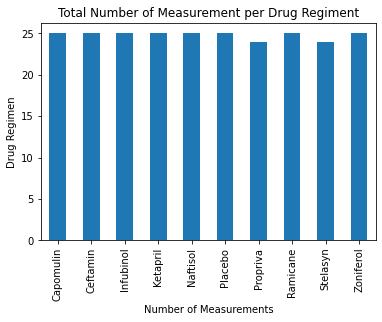

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot
new_list = drug_count['Mouse ID']
pyplot_graph = new_list.plot(kind='bar')
pyplot_graph.set_xlabel("Number of Measurements")
pyplot_graph.set_ylabel("Drug Regimen")
pyplot_graph.set_title("Total Number of Measurement per Drug Regiment")
plt.show()

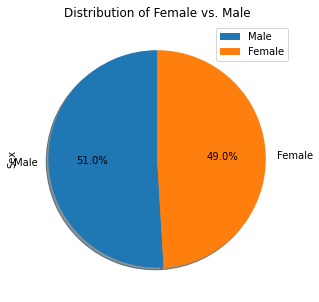

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_df['Sex'].value_counts()
gender_count
gender_df = pd.DataFrame(gender_count)
pandas_plot = gender_df.plot.pie(y='Sex', figsize=(5,5), autopct="%1.1f%%", shadow=True, startangle=90, title='Distribution of Female vs. Male')

Text(0.5, 1.0, 'Distribution of Female vs. Male')

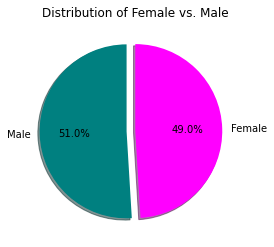

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df
labels = ['Male', 'Female']
sizes = [958, 922]
colors = ['teal', 'magenta']
explode=[0.1,0]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90,)
plt.title('Distribution of Female vs. Male')

## Quartiles, Outliers and Boxplots

In [155]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | (clean_df["Drug Regimen"] == "Ramicane" )|
                           (clean_df["Drug Regimen"] == "Infubinol") | (clean_df["Drug Regimen"] == "Ceftamin"), :]

# Start by getting the last (greatest) timepoint for each mouse
groupedby_drug_list_df = drug_list_df.groupby("Mouse ID")
greatest_timepoint = groupedby_drug_list_df["Timepoint"].max()
greatest_vol = groupedby_drug_list_df['Tumor Volume (mm3)'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_sts_df=pd.DataFrame()
final_sts_df['Timepoint']=greatest_timepoint
final_sts_df['Last Volume']=greatest_vol
merged_df=pd.merge(final_sts_df,clean_df,how='left',on=['Mouse ID','Timepoint'])
cleaned_df=merged_df[['Mouse ID','Timepoint','Tumor Volume (mm3)','Drug Regimen']]
cleaned_grouped=cleaned_df.groupby(['Drug Regimen','Mouse ID'])
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [157]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatment_drug:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = cleaned_df.loc[cleaned_df['Drug Regimen']== i, 'Tumor Volume (mm3)']
    tumor_data.append(final_tumor_vol)
    # add subset
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    # Determine outliers using upper and lower bounds
    lowerq = round(quartiles[0.25], 3)
    upperq = round(quartiles[0.75], 3)
    iqr = round(upperq-lowerq, 3)
    lower_bound = round(lowerq - (1.5*iqr), 3)
    upper_bound = round(upperq + (1.5*iqr), 3)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{i}'s outliers: {outliers}")
        

Capomulin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


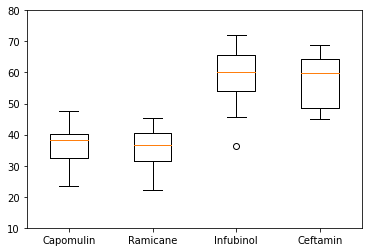

In [160]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
group_drug = merged_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
group_drug_df = grouped_regimens.to_frame()

#Create a list to use as labels and dataframe
tumor_df = grouped_regimens_df.reset_index()
tumor_lists = tumor_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_lists_df = pd.DataFrame(tumor_lists)
tumor_lists_df = tumor_lists_df.reindex(treatment_drug)
tumor_vols = [vol for vol in tumor_lists_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=treatment_drug)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

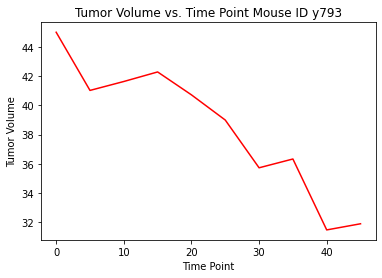

In [128]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
specific_mouse = capomulin_df.loc[capomulin_df['Mouse ID']== 'y793']
time_point = specific_mouse["Timepoint"].tolist()
tumor_vol = specific_mouse["Tumor Volume (mm3)"].tolist()
line_plot = plt.plot(time_point, tumor_vol, color='red')
plt.title("Tumor Volume vs. Time Point Mouse ID y793")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")


Text(0, 0.5, 'Weight (g)')

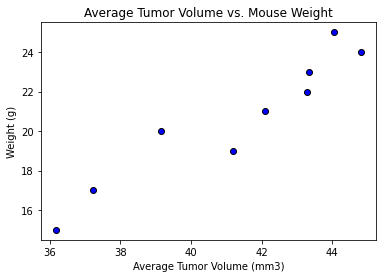

In [108]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Create a df for Capomulin regimen
groupby_weight = capomulin_df.groupby(['Weight (g)'])
avg_tum_vol = groupby_weight["Tumor Volume (mm3)"].mean()

avg= pd.DataFrame(avg_tum_vol)
avg_tumor = avg['Tumor Volume (mm3)'].tolist()
weight = avg.index.tolist()
plt.scatter(avg_tumor, weight, marker="o", facecolors="blue", edgecolors="black")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Weight (g)")

## Correlation and Regression

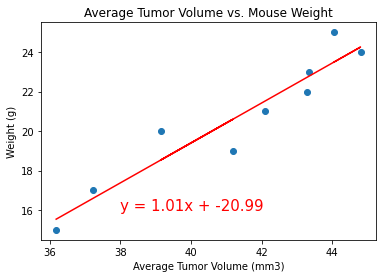

In [136]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg["Tumor Volume (mm3)"]
y_values = avg.index.tolist()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(38,16),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()